In [25]:
import numpy as np
import pandas as pd
import requests
import json

# Sample Data

In [26]:
symbol = 'SHIB'

In [27]:
url = f'https://min-api.cryptocompare.com/data/v2/histoday?fsym={symbol}&tsym=USD&limit=1825'
headers = {
    'Accepts': 'application/json',
    'Authorization': 'Apikey 2572b1c288c45f00c57f9a0dfa1a0da93afc454365cfaaf7ee17820f898fa7b7',
}

res = requests.get(url, headers=headers)
data = json.loads(res.text)

In [40]:
df = pd.DataFrame.from_dict(data['Data']['Data'])
df.to_csv(f'{symbol}.csv')
df
data

{'Response': 'Success',
 'Message': '',
 'HasWarning': False,
 'Type': 100,
 'RateLimit': {},
 'Data': {'Aggregated': False,
  'TimeFrom': 1484006400,
  'TimeTo': 1641686400,
  'Data': [{'time': 1484006400,
    'high': 0,
    'low': 0,
    'open': 0,
    'volumefrom': 0,
    'volumeto': 0,
    'close': 0,
    'conversionType': 'direct',
    'conversionSymbol': ''},
   {'time': 1484092800,
    'high': 0,
    'low': 0,
    'open': 0,
    'volumefrom': 0,
    'volumeto': 0,
    'close': 0,
    'conversionType': 'direct',
    'conversionSymbol': ''},
   {'time': 1484179200,
    'high': 0,
    'low': 0,
    'open': 0,
    'volumefrom': 0,
    'volumeto': 0,
    'close': 0,
    'conversionType': 'direct',
    'conversionSymbol': ''},
   {'time': 1484265600,
    'high': 0,
    'low': 0,
    'open': 0,
    'volumefrom': 0,
    'volumeto': 0,
    'close': 0,
    'conversionType': 'direct',
    'conversionSymbol': ''},
   {'time': 1484352000,
    'high': 0,
    'low': 0,
    'open': 0,
    'volu

In [32]:
import matplotlib.pyplot as plt

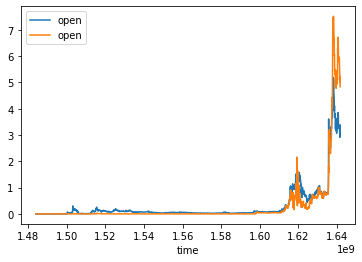

<AxesSubplot:xlabel='time'>

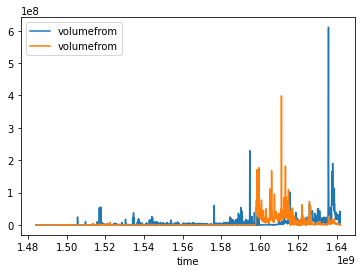

In [33]:
mana_df = pd.read_csv('MANA.csv')
sand_df = pd.read_csv('SAND.csv')

ax = plt.gca()
#mana_df.plot(kind='line', x='time', y='low', ax=ax)
#mana_df.plot(kind='line', x='time', y='high', ax=ax)
mana_df.plot(kind='line', x='time', y='open', ax=ax)
sand_df.plot(kind='line', x='time', y='open', ax=ax)
#mana_df.plot(kind='line', x='time', y='close', ax=ax)
plt.show()

ax = plt.gca()
mana_df.plot(kind='line', x='time', y='volumefrom', ax=ax)
sand_df.plot(kind='line', x='time', y='volumefrom', ax=ax)

# Explorative Analysis

- Volumetric growth
- 

In [34]:
def analyze(symbol):
    period = 30
    df = pd.read_csv(f'{symbol}.csv')
    vol1 = df['volumefrom'].values
    vol2 = df['volumeto'].values
    vol1_conv = np.convolve(vol1, np.ones(period)/period, mode='valid')
    vol2_conv = np.convolve(vol2, np.ones(period)/period, mode='valid')
    price = df['open'].values
    price_conv = np.convolve(price, np.ones(period)/period, mode='valid')

    fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
    fig.suptitle(symbol)
    ax1.set_ylabel('Price')
    ax1.plot(price)
    ax1.plot(price_conv)
    ax2.set_ylabel('Volume')
    #ax2.set_yscale('log')
    ax2.plot(vol1)
    ax2.plot(vol1_conv)


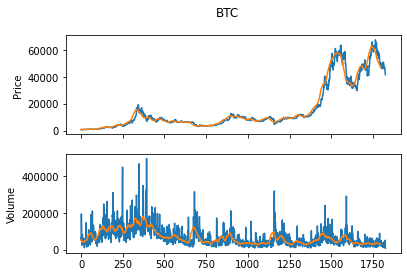

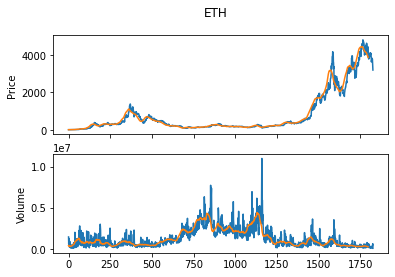

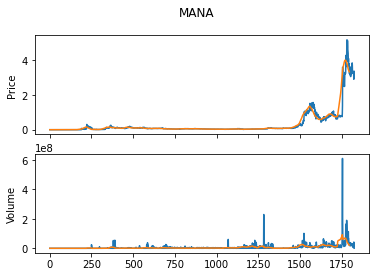

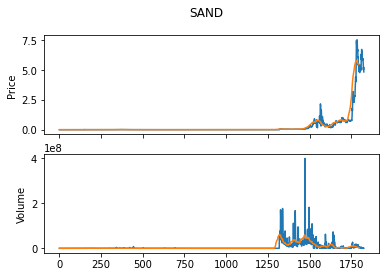

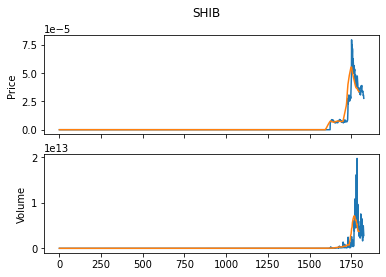

In [35]:
analyze('BTC')
analyze('ETH')
analyze('MANA')
analyze('SAND')
analyze('SHIB')

In [36]:
import scipy.fftpack as ft

/Users/lucasaschenbach/Library/Python/3.8/lib/python/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


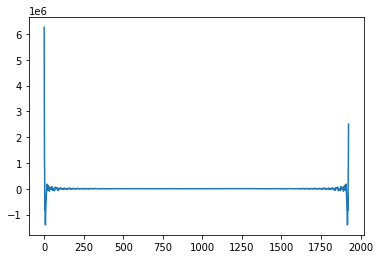

In [38]:
N = 100
    
values = mana_df['volumefrom'].values
values_smooth = np.convolve(values, np.ones(N)/N)
price_ft = ft.ifft(values_smooth)

plt.plot(price_ft)
#plt.plot(values_smooth)

In [ ]:
def classify_breakouts(data):
    